In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import gzip

In [10]:
#loading the data from the given file
image_size = 28
num_images = 55000
f = gzip.open('train-images-idx3-ubyte.gz','r')

f.read(16)
buf = f.read(image_size * image_size * num_images)

data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

data = data.reshape(num_images, image_size, image_size,1)
print(data.shape)

(55000, 28, 28, 1)


In [11]:
#knowning the dimensions:
m=num_images
print("number of training examples: "+ str(m))

number of training examples: 55000


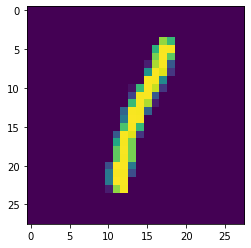

In [12]:
#pritning the images
image = np.asarray(data[510]).squeeze()

plt.imshow(image)
plt.show()

In [13]:
#loading the labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
Ya = np.zeros((1,m))
for i in range(0,54999):   
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    Ya[0,i]=labels
print(Ya[0,550]) 
print(Ya.shape)
print(Ya)

9.0
(1, 55000)
[[5. 0. 4. ... 0. 4. 0.]]


In [14]:
#unrolling the dimensions
X=np.asarray(data[:])
X=X.squeeze()
X=data.reshape(data.shape[0],-1).T
X=X/255
print(X.shape)

(784, 55000)


In [15]:
#defining number of layers and number of nodes in each layer
L=2
layer_dim=[X.shape[0],120,10]

In [16]:
def initialize_parameters(L):
#initializing W and b and storing them in a dictionary
    parameters={}
    for l in range(1,L+1):
        parameters['W'+str(l)]=np.random.randn(layer_dim[l],layer_dim[l-1])*0.01
        parameters['b'+str(l)]=np.zeros((layer_dim[l],1))
        assert(parameters['W'+str(l)].shape==(layer_dim[l],layer_dim[l-1]))
        assert(parameters['b'+str(l)].shape==(layer_dim[l],1))
    #print(parameters['b'+str(2)].shape)    
    return parameters        

In [17]:
#initialize_parameters(L)

In [18]:
def softmax(Z):
    cal=np.sum(np.exp(Z), axis=0,keepdims=True)        
    A=np.exp(Z)/cal.reshape(1,m)
    return A

In [19]:
def activation(parameters,X,L):
    #storing activation values of each layer in a list
    activation_cache=[X]
    linear_cache=[]
    for l in range(1,L+1):
        Z1=np.dot(parameters['W'+str(l)],activation_cache[l-1])+parameters['b'+str(l)]
        linear_cache.append(Z1)
        #assert(Z1.shape==(layer_dim[l],activation_cache[l-1].shape[1]))
        if(l!=L):
            A1=np.maximum(0,Z1)
            activation_cache.append(A1)
            #assert(A1.shape==(layer_dim[l],activation_cache[l-1].shape[1]))
    A=softmax(linear_cache[L-1])        
    activation_cache.append(A)
    cache1=(linear_cache,activation_cache)
    return cache1 

In [20]:
#activation(initialize_parameters(2), X,L)


In [21]:
Y1=np.zeros((10,m))
for i in range(m):
    for j in range(10):
        if(j==Ya[0,i]):
            Y1[j,i]=1
        else:
            Y1[j,i]=0
print(Y1.shape)            

(10, 55000)


In [22]:
def loss(Y_hat):
    J=-np.sum(np.multiply(Y1,(np.log(Y_hat))))
    J=J/m
    #print(J)
    return J

In [23]:
#loss(activation(initialize_parameters(L),X,L)[1][L])

In [24]:
def deriviative_relu(n_l,A):
    dZ=(A+abs(A))/(2*abs(A))
    return dZ
    

In [25]:
#deriviative_relu(activation(initialize_parameters(3), X,L),layer_dim[L-1],)

In [26]:
def deriviative_softmax(dim_of_nodes,cache1):
    dZ=softmax(Z)*(1-softmax(Z))
    return dZ

In [27]:
#deriviative_softmax(layer_dim[L],activation(initialize_parameters(3),X,L))

In [28]:
def backprop(X,L,cache1,parameters):
    #computing the deriviatives of the final layer
    #parameters=initialize_parameters(L)
    dZ={}
    dW={}
    db={}
    dZ['dz'+str(L)]=cache1[1][L]-Y1
    dW['dw'+str(L)]=np.dot(dZ['dz'+str(L)],(cache1[1][L-1]).T)/m
    db['db'+str(L)]=np.sum(dZ['dz'+str(L)], axis=1, keepdims=True)/m
    for l in range(1,L): 
            dZ['dz'+str(L-l)]=np.dot((parameters['W'+str(L-l+1)].T),dZ['dz'+str(L-l+1)])*deriviative_relu(layer_dim[L-l],cache1[0][L-l-1])
            dW['dw'+str(L-l)]=np.dot(dZ['dz'+str(L-l)],cache1[1][L-l-1].T)/m
            db['db'+str(L-l)]=np.sum(dZ['dz'+str(L-l)], axis=1,keepdims=True)/m             
    return dW,db    

In [29]:
#backprop(X,L)

In [30]:
def update_para(parameters,dW,db,alpha):
    for l in range(1,L+1):
            parameters['W'+str(l)]=parameters['W'+str(l)]-alpha*dW['dw'+str(l)]
            parameters['b'+str(l)]=parameters['b'+str(l)]-alpha*db['db'+str(l)]
    return parameters

In [37]:
l = []
def grad_des(alpha,iter):
    parameters=initialize_parameters(L)
    cache1=activation(parameters,X,L)
    dW,db=backprop(X,L,cache1,parameters)
    print(0,"iteration")
    print(loss(cache1[1][L]))
    param=update_para(parameters,dW,db,alpha)
    for i in range(1,iter):
        cache1=activation(param,X,L)
        dW,db=backprop(X,L,cache1,param)
        param=update_para(param,dW,db,alpha)
        print(i,"iteration")
        l.append(loss(cache1[1][L]))
        print(loss(cache1[1][L]))

In [38]:
grad_des(0.7,1500)

0 iteration
2.3021133653959978
1 iteration
2.294429820401509
2 iteration
2.2849502589403343
3 iteration
2.2705315164523574
4 iteration
2.247499758636868
5 iteration
2.210987170867791
6 iteration
2.15483483636267
7 iteration
2.0724571338840985
8 iteration
1.9582521543150602
9 iteration
1.809865430995086
10 iteration
1.6340474727185652
11 iteration
1.4506220447975517
12 iteration
1.2827729382223132
13 iteration
1.1426660776819186
14 iteration
1.0303664460468283
15 iteration
0.9409220826190421
16 iteration
0.870309375459338
17 iteration
0.8258129003079079
18 iteration
0.9154262932930667
19 iteration
1.853371029025661
20 iteration
2.9394747976824167
21 iteration
2.6321227602002395
22 iteration
1.768399603109599
23 iteration
1.4880682151668114
24 iteration
1.3211857879038975
25 iteration
1.1871162031664446
26 iteration
1.0673252964951383
27 iteration
0.9818860105092934
28 iteration
0.9716097154367298
29 iteration
1.0774882018238887
30 iteration
1.290011785733148
31 iteration
1.3732015374679

249 iteration
0.1911972769201433
250 iteration
0.19081131485985797
251 iteration
0.19042731835910007
252 iteration
0.19004550270440765
253 iteration
0.18966633221653198
254 iteration
0.18928958086314257
255 iteration
0.1889148850776282
256 iteration
0.18854186316158394
257 iteration
0.18817048899983665
258 iteration
0.18780078233303407
259 iteration
0.18743260487988964
260 iteration
0.18706602690172058
261 iteration
0.1867013149464547
262 iteration
0.1863389431351117
263 iteration
0.18597848745558707
264 iteration
0.18561966004121433
265 iteration
0.18526251155317128
266 iteration
0.18490647670908614
267 iteration
0.18455179616046563
268 iteration
0.18419869320848156
269 iteration
0.18384715080018066
270 iteration
0.18349718505244553
271 iteration
0.18314879646187743
272 iteration
0.1828021443841118
273 iteration
0.18245716973933854
274 iteration
0.18211390370279135
275 iteration
0.18177211375783092
276 iteration
0.18143182901427232
277 iteration
0.18109304193272177
278 iteration
0.180

493 iteration
0.12943756940608875
494 iteration
0.12926263231561236
495 iteration
0.12908807963481778
496 iteration
0.1289141031942885
497 iteration
0.128740562277329
498 iteration
0.12856736584581854
499 iteration
0.128394418930465
500 iteration
0.12822140964134235
501 iteration
0.12804861332809941
502 iteration
0.12787625534267538
503 iteration
0.1277043402801747
504 iteration
0.12753281484602555
505 iteration
0.12736160440226538
506 iteration
0.12719087259141704
507 iteration
0.12702060402646578
508 iteration
0.1268506565591959
509 iteration
0.12668112660185132
510 iteration
0.12651192979107748
511 iteration
0.1263427590654791
512 iteration
0.126174077533839
513 iteration
0.1260056700003884
514 iteration
0.12583766523472634
515 iteration
0.12567002839154223
516 iteration
0.12550276941087135
517 iteration
0.12533587331201923
518 iteration
0.12516957910729273
519 iteration
0.12500361594601278
520 iteration
0.1248378993116998
521 iteration
0.12467262872532504
522 iteration
0.1245075708

736 iteration
0.09601586700864938
737 iteration
0.09590804507187756
738 iteration
0.09580039993236426
739 iteration
0.09569302377644225
740 iteration
0.09558580704568667
741 iteration
0.09547864921518323
742 iteration
0.09537178385792118
743 iteration
0.09526515961225793
744 iteration
0.095158738502115
745 iteration
0.09505267425890675
746 iteration
0.09494674947760837
747 iteration
0.09484107776389647
748 iteration
0.09473550762362119
749 iteration
0.09463006330221793
750 iteration
0.09452486315038064
751 iteration
0.09441981594348166
752 iteration
0.09431501632946002
753 iteration
0.09421037383718672
754 iteration
0.0941058678932842
755 iteration
0.09400153448716676
756 iteration
0.09389743651191403
757 iteration
0.09379352949838296
758 iteration
0.0936897577366294
759 iteration
0.09358636575512295
760 iteration
0.09348308219840246
761 iteration
0.09337999070905088
762 iteration
0.0932769933730444
763 iteration
0.0931741930983775
764 iteration
0.0930715659764887
765 iteration
0.09296

979 iteration
0.07475563036466361
980 iteration
0.0746848537321831
981 iteration
0.0746142973023273
982 iteration
0.07454370757635716
983 iteration
0.07447334064857679
984 iteration
0.0744030269962702
985 iteration
0.07433292223946815
986 iteration
0.07426296492141071
987 iteration
0.07419309951097108
988 iteration
0.07412317687015367
989 iteration
0.07405349688576246
990 iteration
0.07398386830949014
991 iteration
0.07391442838736582
992 iteration
0.07384491551439236
993 iteration
0.07377560101826612
994 iteration
0.07370640471118671
995 iteration
0.07363732982641198
996 iteration
0.07356824437898697
997 iteration
0.07349943559855968
998 iteration
0.07343070005716776
999 iteration
0.07336222851479993
1000 iteration
0.07329372650073891
1001 iteration
0.07322531759236411
1002 iteration
0.07315696366267596
1003 iteration
0.07308877831554185
1004 iteration
0.07302062607077661
1005 iteration
0.0729527260148209
1006 iteration
0.07288497288635012
1007 iteration
0.07281736579874112
1008 itera

1215 iteration
0.06071423060099027
1216 iteration
0.060664675340813184
1217 iteration
0.06061497669704871
1218 iteration
0.06056535662983575
1219 iteration
0.06051573623932306
1220 iteration
0.060466270584452975
1221 iteration
0.060416934460674455
1222 iteration
0.06036741538883382
1223 iteration
0.060318144274978086
1224 iteration
0.06026888167982967
1225 iteration
0.06021977950406078
1226 iteration
0.060170559902814315
1227 iteration
0.06012165684699832
1228 iteration
0.06007264166289201
1229 iteration
0.06002375570231825
1230 iteration
0.05997479250583744
1231 iteration
0.05992597587560584
1232 iteration
0.059877281576904404
1233 iteration
0.05982857892893021
1234 iteration
0.05978006148629492
1235 iteration
0.059731561508756525
1236 iteration
0.059683001077886405
1237 iteration
0.059634540133796494
1238 iteration
0.05958624274624277
1239 iteration
0.059537953625782916
1240 iteration
0.05948971046581911
1241 iteration
0.05944158179011614
1242 iteration
0.05939339699520061
1243 itera

1448 iteration
0.050674933785008584
1449 iteration
0.050637525057986695
1450 iteration
0.0506002642604162
1451 iteration
0.050562927345957936
1452 iteration
0.05052547960332172
1453 iteration
0.05048842404597686
1454 iteration
0.05045126720490427
1455 iteration
0.050413992914579805
1456 iteration
0.05037675869842262
1457 iteration
0.05033983653625236
1458 iteration
0.05030271411340099
1459 iteration
0.050265698492329716
1460 iteration
0.05022847556442689
1461 iteration
0.05019162485924297
1462 iteration
0.05015477441728544
1463 iteration
0.050117846174574134
1464 iteration
0.050080906215777724
1465 iteration
0.05004429282044884
1466 iteration
0.05000757178512243
1467 iteration
0.049970842044565
1468 iteration
0.0499339999165531
1469 iteration
0.049897367822814696
1470 iteration
0.04986081279046515
1471 iteration
0.049824428390918885
1472 iteration
0.04978795195310416
1473 iteration
0.04975157652845647
1474 iteration
0.04971512202828091
1475 iteration
0.04967888035604948
1476 iteration


In [39]:
import matplotlib.pyplot as plt

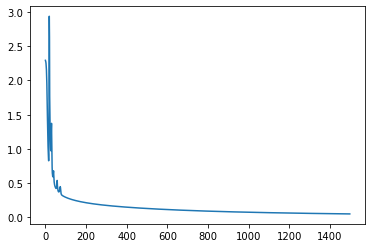

In [40]:
plt.plot(l)